<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/mvgr/MVG-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVG-R Nominal (R$)
Analise e visualize o indicador MVG-R (código 25419) utilizando o pacote `python-bcb`.

In [1]:
!pip install python-bcb

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos.


In [2]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the series code for the MVG-R
mvg_r_code = 25419

# Define the end date as today
end_date = datetime.now()

# Define the start date for the historical period (e.g., from 2002-01-01 for MVG-R)
# The MVG-R series typically starts later than the PIB series, so adjusting the start date is appropriate.
start_date_overall = datetime(2002, 1, 1)

# List to store dataframes for each collection period
dfs_mvg_r = []

# Define the period length in years for chunking data collection
period_years_mvg_r = 10

# Loop through periods backwards from the end date
current_end_date_mvg_r = end_date
while current_end_date_mvg_r > start_date_overall:
    # Determine the start date for the current period, ensuring it's not before start_date_overall
    current_start_date_mvg_r = max(start_date_overall, current_end_date_mvg_r - timedelta(days=period_years_mvg_r * 365))

    print(f"Attempting to retrieve MVG-R data from {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        # Pass the series code as a list of tuples to specify the column name
        df_period_mvg_r = sgs.get([('mvg_r', mvg_r_code)], start=current_start_date_mvg_r.strftime('%Y-%m-%d'), end=current_end_date_mvg_r.strftime('%Y-%m-%d'))

        if not df_period_mvg_r.empty:
            print(f"MVG-R data retrieved for the period: {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}")
            dfs_mvg_r.append(df_period_mvg_r)
        else:
            print(f"No MVG-R data retrieved for the period: {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving MVG-R data for the period {current_start_date_mvg_r.strftime('%Y-%m-%d')} to {current_end_date_mvg_r.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period as the day before the current period's start date
    current_end_date_mvg_r = current_start_date_mvg_r - timedelta(days=1)

print(f"Collected {len(dfs_mvg_r)} dataframes for different MVG-R periods.")

# Combine all dataframes in the list if the list is not empty
if dfs_mvg_r:
    # Concatenate the dataframes and sort the index (dates) to ensure chronological order
    df_mvg_r = pd.concat(dfs_mvg_r).sort_index()
    print("\nMVG-R DataFrames combined successfully!")

    print("\nPrimeiras 5 linhas do DataFrame df_mvg_r:")
    display(df_mvg_r.head())

    print("\nÚltimas 5 linhas do DataFrame df_mvg_r:")
    display(df_mvg_r.tail())

    print("\nInformações do DataFrame df_mvg_r:")
    df_mvg_r.info()

else:
    print("The list of MVG-R DataFrames is empty. No data to combine.")
    df_mvg_r = None

# Rename the DataFrame to df for consistency with the rest of the notebook
df = df_mvg_r

Attempting to retrieve MVG-R data from 2015-10-22 to 2025-10-19
MVG-R data retrieved for the period: 2015-10-22 to 2025-10-19
Attempting to retrieve MVG-R data from 2005-10-23 to 2015-10-21
MVG-R data retrieved for the period: 2005-10-23 to 2015-10-21
Attempting to retrieve MVG-R data from 2002-01-01 to 2005-10-22
MVG-R data retrieved for the period: 2002-01-01 to 2005-10-22
Collected 3 dataframes for different MVG-R periods.

MVG-R DataFrames combined successfully!

Primeiras 5 linhas do DataFrame df_mvg_r:


,mvg_r
Date,
2004-03-01,44797
2004-04-01,43000
2004-05-01,43638
2004-06-01,43975
2004-07-01,43465



Últimas 5 linhas do DataFrame df_mvg_r:


,mvg_r
Date,
2025-04-01,264000
2025-05-01,260000
2025-06-01,260000
2025-07-01,258500
2025-08-01,256000



Informações do DataFrame df_mvg_r:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2004-03-01 to 2025-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mvg_r   260 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


## Análise exploratória

### Subtask:
Realizar uma análise inicial dos dados para entender sua estrutura e características.


In [3]:
# Display the first 5 rows of the DataFrame
print("Primeiras 5 linhas do DataFrame df:")
display(df.head())

# Display the last 5 rows of the DataFrame
print("\nÚltimas 5 linhas do DataFrame df:")
display(df.tail())

# Get information about the DataFrame (data types, non-null counts)
print("\nInformações do DataFrame df:")
df.info()

# Generate descriptive statistics for the 'mvg_r' column
print("\nEstatísticas Descritivas do MVG-R:")
print(df['mvg_r'].describe())

# Check the date range of the data
min_date = df.index.min()
max_date = df.index.max()
print(f"\nPeríodo dos dados do MVG-R: {min_date.strftime('%Y-%m-%d')} a {max_date.strftime('%Y-%m-%d')}")

Primeiras 5 linhas do DataFrame df:


,mvg_r
Date,
2004-03-01,44797
2004-04-01,43000
2004-05-01,43638
2004-06-01,43975
2004-07-01,43465



Últimas 5 linhas do DataFrame df:


,mvg_r
Date,
2025-04-01,264000
2025-05-01,260000
2025-06-01,260000
2025-07-01,258500
2025-08-01,256000



Informações do DataFrame df:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2004-03-01 to 2025-08-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   mvg_r   260 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB

Estatísticas Descritivas do MVG-R:
count       260.000000
mean     141180.942308
std       66825.783523
min       42000.000000
25%       80000.000000
50%      145033.000000
75%      180875.000000
max      264000.000000
Name: mvg_r, dtype: float64

Período dos dados do MVG-R: 2004-03-01 a 2025-08-01


## Visualização do MVG-R

### Subtask:
Criar um gráfico para visualizar a evolução histórica do indicador MVG-R ao longo do tempo.

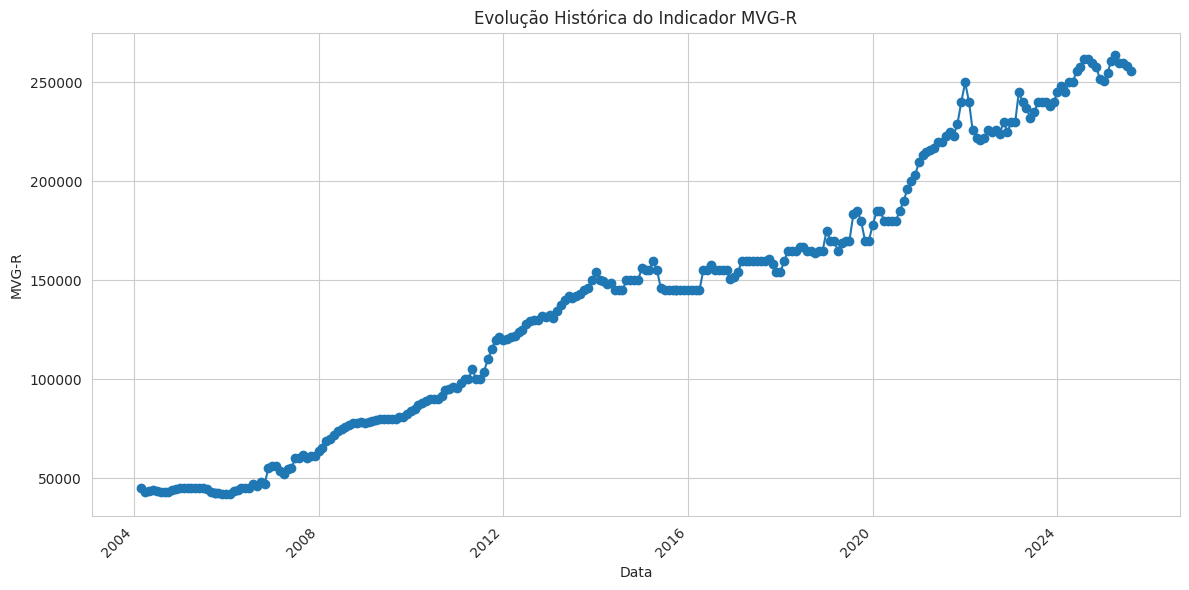

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and an axes for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca() # Get current axes

# Plot the time series of the MVG-R
df['mvg_r'].plot(ax=ax, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica do Indicador MVG-R')
plt.xlabel('Data')
plt.ylabel('MVG-R')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados do MVG-R em json

### Subtask:
Gerar um arquivo JSON com os dados consolidados do indicador MVG-R.

In [5]:
import json

# Create an empty list to store the data points for the JSON output
data_list_mvg_r = []

# Iterate through the df DataFrame (which now contains MVG-R data)
for index, row in df.iterrows():
    # Append a dictionary to data_list_mvg_r with 'date' and 'value'
    data_list_mvg_r.append({
        "date": index.strftime('%Y-%m-%d'),  # Format date as YYYY-MM-DD
        "rate": int(row['mvg_r'])  # Convert int64 to standard Python int
    })

# Create the main dictionary structure for the JSON output
json_output_mvg_r = {
    "indicatorName": "MVG-R (código 25419)",  # Set the indicator name
    "data": data_list_mvg_r  # Include the list of data points
}

# Define the output file path
output_file_path = 'mvgr-nominal.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path, 'w') as f:
    json.dump(json_output_mvg_r, f, indent=4)

print(f"Dados do MVG-R formatados e salvos em '{output_file_path}'")

Dados do MVG-R formatados e salvos em 'mvgr-nominal.json'


# MVG-R Real (R$)
Calcule o MVG-R Real (descontado da inflação) utilizando o IPCA como inflação a ser descontada. Apresente o resultado em um gráfico e salve os dados em um arquivo JSON.

## Coleta de dados do ipca

### Subtask:
Obter os dados históricos do IPCA utilizando o pacote `python-bcb`. O código para o IPCA geral é 433.


**Reasoning**:
Obtain the historical IPCA data using the `python-bcb` package as instructed in the subtask.



In [6]:
# Define the series code for the IPCA
ipca_code = 433

# Define the start date for the IPCA data collection.
# Ensure it is at least as early as the start date of the MVG-R data.
start_date_ipca = datetime(2004, 3, 1)

# Define the end date as today (already defined as end_date in the previous cell)

print(f"Attempting to retrieve IPCA data from {start_date_ipca.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

try:
    # Use the bcb.sgs.get() function to retrieve the series data
    df_ipca = sgs.get([('ipca', ipca_code)], start=start_date_ipca.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

    if not df_ipca.empty:
        print("IPCA data retrieved successfully!")

        print("\nPrimeiras 5 linhas do DataFrame df_ipca:")
        display(df_ipca.head())

        print("\nÚltimas 5 linhas do DataFrame df_ipca:")
        display(df_ipca.tail())

        print("\nInformações do DataFrame df_ipca:")
        df_ipca.info()

    else:
        print("No IPCA data retrieved.")
        df_ipca = None

except Exception as e:
    print(f"An error occurred while retrieving IPCA data: {e}")
    df_ipca = None

Attempting to retrieve IPCA data from 2004-03-01 to 2025-10-19
IPCA data retrieved successfully!

Primeiras 5 linhas do DataFrame df_ipca:


,ipca
Date,
2004-03-01,0.47
2004-04-01,0.37
2004-05-01,0.51
2004-06-01,0.71
2004-07-01,0.91



Últimas 5 linhas do DataFrame df_ipca:


,ipca
Date,
2025-05-01,0.26
2025-06-01,0.24
2025-07-01,0.26
2025-08-01,-0.11
2025-09-01,0.48



Informações do DataFrame df_ipca:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 259 entries, 2004-03-01 to 2025-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ipca    259 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


## Combinar os dados

### Subtask:
Combinar os dataframes do MVG-R (`df`) e do IPCA (`df_ipca`) com base na data.


**Reasoning**:
Combine the MVG-R and IPCA dataframes based on their date index and display the resulting dataframe's head and info to verify the merge.



In [7]:
# Combine the df and df_ipca DataFrames based on their index (Date)
# Using an outer join to keep all dates present in both DataFrames
df_combined = pd.merge(df, df_ipca, left_index=True, right_index=True, how='outer')

# Display the first few rows of the combined DataFrame
print("Primeiras 5 linhas do DataFrame combinado:")
display(df_combined.head())

# Get information about the combined DataFrame
print("\nInformações do DataFrame combinado:")
df_combined.info()

Primeiras 5 linhas do DataFrame combinado:


,mvg_r,ipca
Date,,
2004-03-01,44797.0,0.47
2004-04-01,43000.0,0.37
2004-05-01,43638.0,0.51
2004-06-01,43975.0,0.71
2004-07-01,43465.0,0.91



Informações do DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2004-03-01 to 2025-09-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mvg_r   260 non-null    float64
 1   ipca    261 non-null    float64
dtypes: float64(2)
memory usage: 6.1 KB


## Calcular o mvg-r real

### Subtask:
Descontar a inflação do MVG-R nominal utilizando os dados do IPCA.


**Reasoning**:
Calculate the cumulative inflation index and the real MVG-R value, then store it in the dataframe and display the head.



In [8]:
# Calculate the cumulative inflation index
# Handle potential missing values by filling with 0 before calculating the factor
df_combined['ipca_factor'] = (df_combined['ipca'].fillna(0) / 100) + 1

# Calculate the cumulative product, handling potential NaNs by filling with 1 before cumprod
# This assumes the first valid IPCA value should be the base for subsequent calculations.
# A more robust approach might be to forward-fill NaNs before calculating the factor.
# Let's refine this: forward-fill NaNs in IPCA *before* calculating the factor.
df_combined['ipca_filled'] = df_combined['ipca'].fillna(method='ffill')
df_combined['ipca_factor'] = (df_combined['ipca_filled'] / 100) + 1

# Calculate the cumulative inflation index. Set the initial value to 1.
df_combined['cumulative_inflation_index'] = df_combined['ipca_factor'].cumprod()

# Choose the first available date as the base period for the real value calculation.
# Find the cumulative inflation index value at the first date with a non-null MVG-R value.
first_valid_mvg_r_date = df_combined['mvg_r'].first_valid_index()
base_inflation_index = df_combined.loc[first_valid_mvg_r_date, 'cumulative_inflation_index']

# Normalize the cumulative inflation index so the base period has an index of 1
df_combined['normalized_cumulative_inflation_index'] = df_combined['cumulative_inflation_index'] / base_inflation_index

# Calculate the MVG-R Real by dividing the 'mvg_r' column by the normalized cumulative inflation index.
# Aligning indices is implicit when operating on columns of the same DataFrame.
df_combined['mvg_r_real'] = df_combined['mvg_r'] / df_combined['normalized_cumulative_inflation_index']

# Display the first few rows of the df_combined DataFrame, including the new 'mvg_r_real' column.
print("Primeiras 5 linhas do DataFrame combinado com MVG-R Real:")
display(df_combined.head())

print("\nÚltimas 5 linhas do DataFrame combinado com MVG-R Real:")
display(df_combined.tail())

Primeiras 5 linhas do DataFrame combinado com MVG-R Real:


/tmp/ipython-input-2141008105.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_combined['ipca_filled'] = df_combined['ipca'].fillna(method='ffill')


,mvg_r,ipca,ipca_factor,ipca_filled,cumulative_inflation_index,normalized_cumulative_inflation_index,mvg_r_real
Date,,,,,,,
2004-03-01,44797.0,0.47,1.0047,0.47,1.004700,1.000000,44797.000000
2004-04-01,43000.0,0.37,1.0037,0.37,1.008417,1.003700,42841.486500
2004-05-01,43638.0,0.51,1.0051,0.51,1.013560,1.008819,43256.526318
2004-06-01,43975.0,0.71,1.0071,0.71,1.020757,1.015981,43283.269128
2004-07-01,43465.0,0.91,1.0091,0.91,1.030045,1.025227,42395.492494



Últimas 5 linhas do DataFrame combinado com MVG-R Real:


,mvg_r,ipca,ipca_factor,ipca_filled,cumulative_inflation_index,normalized_cumulative_inflation_index,mvg_r_real
Date,,,,,,,
2025-05-01,260000.0,0.26,1.0026,0.26,3.278813,3.263475,79669.686064
2025-06-01,260000.0,0.24,1.0024,0.24,3.286682,3.271307,79478.936616
2025-07-01,258500.0,0.26,1.0026,0.26,3.295227,3.279812,78815.484031
2025-08-01,256000.0,-0.11,0.9989,-0.11,3.291603,3.276205,78139.198425
2025-09-01,NaN,0.48,1.0048,0.48,3.307402,3.291930,NaN


## Visualizar o mvg-r real

### Subtask:
Criar um gráfico para visualizar a evolução histórica do MVG-R Real.


**Reasoning**:
Create a line plot to visualize the historical evolution of the real MVG-R indicator using the 'mvg_r_real' column from the combined DataFrame.



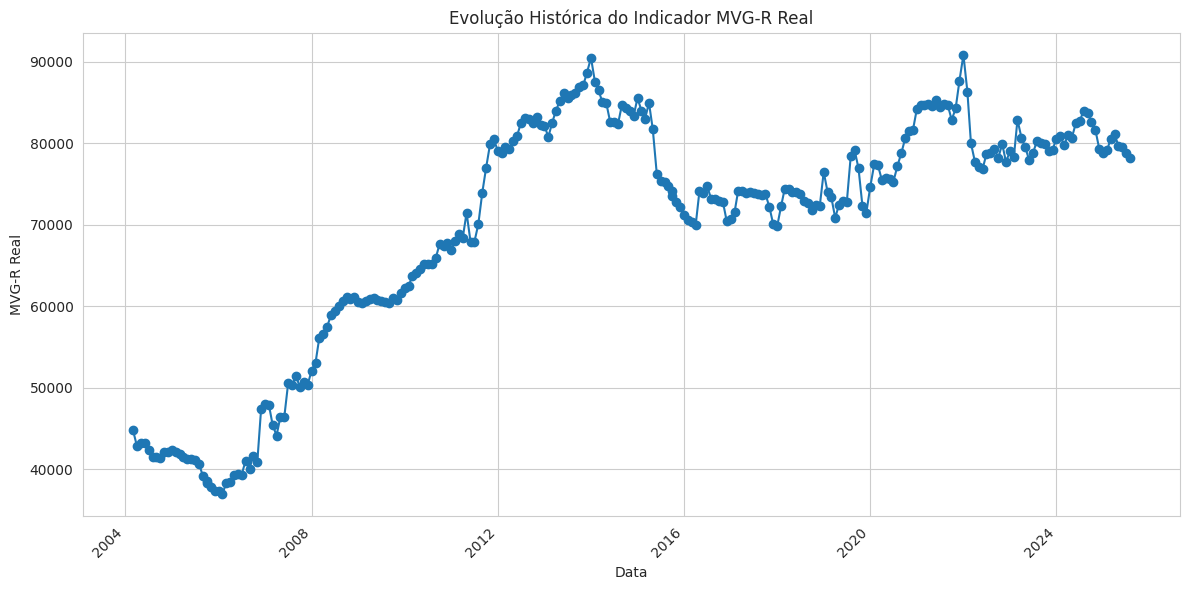

In [9]:
# Create a figure and an axes for the plot
plt.figure(figsize=(12, 6))
ax = plt.gca() # Get current axes

# Plot the time series of the MVG-R Real
df_combined['mvg_r_real'].plot(ax=ax, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica do Indicador MVG-R Real')
plt.xlabel('Data')
plt.ylabel('MVG-R Real')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

## Salvar dados do mvg-r real em json

### Subtask:
Gerar um arquivo JSON com os dados consolidados do indicador MVG-R Real.


**Reasoning**:
Generate a JSON file containing the real MVG-R data from the df_combined DataFrame.



In [ ]:
import json

# Create an empty list to store the data points for the JSON output
data_list_mvg_r_real = []

# Iterate through the df_combined DataFrame
for index, row in df_combined.iterrows():
    # Check if the 'mvg_r_real' value is not NaN before appending
    if pd.notna(row['mvg_r_real']):
        # Append a dictionary to data_list_mvg_r_real with 'date' and 'value'
        data_list_mvg_r_real.append({
            "date": index.strftime('%Y-%m-%d'),  # Format date as YYYY-MM-DD
            "rate": float(row['mvg_r_real'])  # Convert to standard Python float
        })

# Create the main dictionary structure for the JSON output
json_output_mvg_r_real = {
    "indicatorName": "MVG-R Real (descontado do IPCA)",  # Set the indicator name
    "data": data_list_mvg_r_real  # Include the list of data points
}

# Define the output file path
output_file_path_real = 'mvgr-real.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path_real, 'w') as f:
    json.dump(json_output_mvg_r_real, f, indent=4)

print(f"Dados do MVG-R Real formatados e salvos em '{output_file_path_real}'")

Dados do MVG-R Real formatados e salvos em 'mvgr-real.json'


# Validação

### Validar Cálculo do MVG-R Real

Para validar o cálculo do MVG-R Real, vamos comparar os valores nominais e reais em datas específicas. A lógica é que o valor real na data base (onde o índice de inflação normalizado é 1) deve ser igual ao valor nominal nessa data. Para datas posteriores, o valor real deve refletir o valor nominal descontado pela inflação acumulada desde a data base.

In [10]:
# Choose a few dates for validation
# The first date in the DataFrame with non-null MVG-R should have nominal == real
validation_dates = [
    df_combined['mvg_r'].first_valid_index(), # First valid date
    df_combined.index[len(df_combined) // 2], # A date in the middle
    df_combined.index[-1] # The last date in the DataFrame
]

print("Validação do Cálculo do MVG-R Real:")

for date in validation_dates:
    if date in df_combined.index and pd.notna(df_combined.loc[date, 'mvg_r_real']):
        nominal_value = df_combined.loc[date, 'mvg_r']
        real_value = df_combined.loc[date, 'mvg_r_real']
        normalized_inflation_index = df_combined.loc[date, 'normalized_cumulative_inflation_index']

        print(f"\nData: {date.strftime('%Y-%m-%d')}")
        print(f"MVG-R Nominal: {nominal_value:.2f}")
        print(f"MVG-R Real: {real_value:.2f}")
        print(f"Índice de Inflação Normalizado: {normalized_inflation_index:.4f}")

        # Check the calculation: real = nominal / normalized_inflation_index
        calculated_real = nominal_value / normalized_inflation_index
        print(f"MVG-R Real Calculado (Nominal / Índice): {calculated_real:.2f}")

        # Compare the calculated real value with the one in the DataFrame
        tolerance = 1e-6 # Allow for small floating point differences
        if abs(real_value - calculated_real) < tolerance:
            print("Validação: Cálculo correto nesta data.")
        else:
            print("Validação: Divergência no cálculo nesta data!")
            print(f"Diferença: {abs(real_value - calculated_real):.6f}")
    elif date in df_combined.index:
         print(f"\nData: {date.strftime('%Y-%m-%d')} - MVG-R Real é NaN, não é possível validar.")
    else:
        print(f"\nData: {date.strftime('%Y-%m-%d')} não encontrada no DataFrame.")

Validação do Cálculo do MVG-R Real:

Data: 2004-03-01
MVG-R Nominal: 44797.00
MVG-R Real: 44797.00
Índice de Inflação Normalizado: 1.0000
MVG-R Real Calculado (Nominal / Índice): 44797.00
Validação: Cálculo correto nesta data.

Data: 2014-12-01
MVG-R Nominal: 150000.00
MVG-R Real: 83271.90
Índice de Inflação Normalizado: 1.8013
MVG-R Real Calculado (Nominal / Índice): 83271.90
Validação: Cálculo correto nesta data.

Data: 2025-09-01 - MVG-R Real é NaN, não é possível validar.


### Validar Variação entre as Duas Primeiras Datas Disponíveis

Vamos validar a relação entre a variação percentual do MVG-R nominal e a variação do IPCA entre as duas primeiras datas em que o MVG-R está disponível.

In [19]:
# Find the first two dates with non-null MVG-R values
first_valid_mvg_r_date = df_combined['mvg_r'].first_valid_index()

# Find the index of the first valid date
first_valid_index_loc = df_combined.index.get_loc(first_valid_mvg_r_date)

# Find the index of the next valid date after the first one
# We look for the first non-null value in the 'mvg_r' column starting from the row *after* the first valid index.
next_valid_index_loc = df_combined['mvg_r'].iloc[first_valid_index_loc + 1:].first_valid_index()


if first_valid_mvg_r_date is not None and next_valid_index_loc is not None:
    second_valid_mvg_r_date = next_valid_index_loc

    print(f"Validando a variação entre as datas: {first_valid_mvg_r_date.strftime('%Y-%m-%d')} e {second_valid_mvg_r_date.strftime('%Y-%m-%d')}")

    # Get the nominal MVG-R values for these dates
    mvg_r_nominal_first = df_combined.loc[first_valid_mvg_r_date, 'mvg_r']
    mvg_r_nominal_second = df_combined.loc[second_valid_mvg_r_date, 'mvg_r']

    # Get the real MVG-R values for these dates
    mvg_r_real_first = df_combined.loc[first_valid_mvg_r_date, 'mvg_r_real']
    mvg_r_real_second = df_combined.loc[second_valid_mvg_r_date, 'mvg_r_real']

    # Get the IPCA values for these dates
    ipca_first = df_combined.loc[first_valid_mvg_r_date, 'ipca']
    ipca_second = df_combined.loc[second_valid_mvg_r_date, 'ipca']

    print(f"MVG-R Nominal na primeira data ({first_valid_mvg_r_date.strftime('%Y-%m-%d')}): {mvg_r_nominal_first:.2f}")
    print(f"MVG-R Nominal na segunda data ({second_valid_mvg_r_date.strftime('%Y-%m-%d')}): {mvg_r_nominal_second:.2f}")
    print(f"MVG-R Real na primeira data ({first_valid_mvg_r_date.strftime('%Y-%m-%d')}): {mvg_r_real_first:.2f}")
    print(f"MVG-R Real na segunda data ({second_valid_mvg_r_date.strftime('%Y-%m-%d')}): {mvg_r_real_second:.2f}")
    print(f"IPCA na primeira data ({first_valid_mvg_r_date.strftime('%Y-%m-%d')}): {ipca_first:.2f}")
    print(f"IPCA na segunda data ({second_valid_mvg_r_date.strftime('%Y-%m-%d')}): {ipca_second:.2f}")


    # Calculate the percentage change in nominal MVG-R
    percentage_change_mvg_r_nominal = ((mvg_r_nominal_second - mvg_r_nominal_first) / mvg_r_nominal_first) * 100

    # Calculate the percentage change in real MVG-R
    percentage_change_mvg_r_real = ((mvg_r_real_second - mvg_r_real_first) / mvg_r_real_first) * 100


    # The IPCA value itself is the monthly percentage change
    # If the dates are consecutive months, the IPCA value at the second date represents the change from the first.
    # If they are not consecutive, this interpretation would need adjustment.
    # Assuming monthly data and consecutive valid MVG-R points for this validation.
    ipca_change = ipca_second

    print(f"\nVariação Percentual do MVG-R Nominal: {percentage_change_mvg_r_nominal:.2f}%")
    print(f"Variação Percentual do MVG-R Real: {percentage_change_mvg_r_real:.2f}%")
    print(f"Variação do IPCA (no segundo mês): {ipca_change:.2f}%")

    # Note: We expect the MVG-R Real change to be approximately (Nominal Change - IPCA Change),
    # but not exactly equal due to compounding and the nature of real value calculation.
    # This comparison helps to see if the magnitudes are somewhat aligned.
    print("\nComparação da variação:")
    print(f"Variação Nominal ({percentage_change_mvg_r_nominal:.2f}%) vs Variação Real ({percentage_change_mvg_r_real:.2f}%) vs IPCA ({ipca_change:.2f}%)")


else:
    print("Não foi possível encontrar as duas primeiras datas com dados de MVG-R suficientes para esta validação.")

Validando a variação entre as datas: 2004-03-01 e 2004-04-01
MVG-R Nominal na primeira data (2004-03-01): 44797.00
MVG-R Nominal na segunda data (2004-04-01): 43000.00
MVG-R Real na primeira data (2004-03-01): 44797.00
MVG-R Real na segunda data (2004-04-01): 42841.49
IPCA na primeira data (2004-03-01): 0.47
IPCA na segunda data (2004-04-01): 0.37

Variação Percentual do MVG-R Nominal: -4.01%
Variação Percentual do MVG-R Real: -4.37%
Variação do IPCA (no segundo mês): 0.37%

Comparação da variação:
Variação Nominal (-4.01%) vs Variação Real (-4.37%) vs IPCA (0.37%)


In [21]:
# Calculate the expected difference based on the IPCA percentage and the nominal value in the second month
expected_diff = mvg_r_nominal_second * (ipca_second / 100)

# Calculate the actual difference between nominal and real MVG-R in the second month
actual_diff = mvg_r_nominal_second - mvg_r_real_second

print(f"\nCálculo da diferença esperada (MVG-R Nominal na segunda data * IPCA da segunda data): {expected_diff:.2f}")
print(f"Diferença real (MVG-R Nominal na segunda data - MVG-R Real na segunda data): {actual_diff:.2f}")

# Compare the expected and actual differences
tolerance = 1e-2 # Using a slightly larger tolerance for percentage calculations
if abs(expected_diff - actual_diff) < tolerance:
    print("Validação: A diferença esperada e a diferença real são aproximadamente iguais.")
else:
    print("Validação: Há uma diferença entre a diferença esperada e a diferença real.")
    print(f"Diferença absoluta: {abs(expected_diff - actual_diff):.2f}")


Cálculo da diferença esperada (MVG-R Nominal na segunda data * IPCA da segunda data): 159.10
Diferença real (MVG-R Nominal na segunda data - MVG-R Real na segunda data): 158.51
Validação: Há uma diferença entre a diferença esperada e a diferença real.
Diferença absoluta: 0.59


In [20]:
# Calculate the absolute difference between nominal and real MVG-R for the first two dates
abs_diff_mvg_r_first = abs(mvg_r_nominal_first - mvg_r_real_first)
abs_diff_mvg_r_second = abs(mvg_r_nominal_second - mvg_r_real_second)

# Calculate the absolute difference between the IPCA values for the first two dates
abs_diff_ipca = abs(ipca_second - ipca_first)


print(f"\nDiferença absoluta entre MVG-R Nominal e Real na primeira data ({first_valid_mvg_r_date.strftime('%Y-%m-%d')}): {abs_diff_mvg_r_first:.2f}")
print(f"Diferença absoluta entre MVG-R Nominal e Real na segunda data ({second_valid_mvg_r_date.strftime('%Y-%m-%d')}): {abs_diff_mvg_r_second:.2f}")
print(f"Diferença absoluta entre os valores de IPCA ({first_valid_mvg_r_date.strftime('%Y-%m-%d')} e {second_valid_mvg_r_date.strftime('%Y-%m-%d')}): {abs_diff_ipca:.2f}")

# Compare the differences
print("\nComparação das diferenças absolutas:")
# Note: The relationship is not expected to be a simple equality of absolute differences
# due to the compounding nature of inflation and the real value calculation.
# This comparison is to observe the magnitudes.
print(f"Diferença MVG-R (Primeira Data): {abs_diff_mvg_r_first:.2f}")
print(f"Diferença MVG-R (Segunda Data): {abs_diff_mvg_r_second:.2f}")
print(f"Diferença IPCA: {abs_diff_ipca:.2f}")


Diferença absoluta entre MVG-R Nominal e Real na primeira data (2004-03-01): 0.00
Diferença absoluta entre MVG-R Nominal e Real na segunda data (2004-04-01): 158.51
Diferença absoluta entre os valores de IPCA (2004-03-01 e 2004-04-01): 0.10

Comparação das diferenças absolutas:
Diferença MVG-R (Primeira Data): 0.00
Diferença MVG-R (Segunda Data): 158.51
Diferença IPCA: 0.10


In [18]:
print(f"IPCA no primeiro mês ({first_valid_mvg_r_date.strftime('%Y-%m-%d')}): {ipca_first:.2f}%")

IPCA no primeiro mês (2004-03-01): 0.47%


In [16]:
df_combined['mvg_r']
# second_valid_mvg_r_date

,mvg_r
Date,
2004-03-01,44797.0
2004-04-01,43000.0
2004-05-01,43638.0
2004-06-01,43975.0
2004-07-01,43465.0
...,...
2025-05-01,260000.0
2025-06-01,260000.0
2025-07-01,258500.0


### Validar Variação ao Longo de Todo o Período

Vamos validar a variação do MVG-R (nominal e real) em comparação com a inflação acumulada (IPCA) ao longo de todo o período disponível nos dados.

In [22]:
# Find the first and last dates with non-null MVG-R values
first_valid_mvg_r_date_overall = df_combined['mvg_r'].first_valid_index()
last_valid_mvg_r_date_overall = df_combined['mvg_r'].last_valid_index()

if first_valid_mvg_r_date_overall is not None and last_valid_mvg_r_date_overall is not None and first_valid_mvg_r_date_overall != last_valid_mvg_r_date_overall:
    print(f"Validando a variação ao longo do período: {first_valid_mvg_r_date_overall.strftime('%Y-%m-%d')} a {last_valid_mvg_r_date_overall.strftime('%Y-%m-%d')}")

    # Get the nominal MVG-R values for the start and end dates
    mvg_r_nominal_start = df_combined.loc[first_valid_mvg_r_date_overall, 'mvg_r']
    mvg_r_nominal_end = df_combined.loc[last_valid_mvg_r_date_overall, 'mvg_r']

    # Get the real MVG-R values for the start and end dates
    mvg_r_real_start = df_combined.loc[first_valid_mvg_r_date_overall, 'mvg_r_real']
    mvg_r_real_end = df_combined.loc[last_valid_mvg_r_date_overall, 'mvg_r_real']

    # Get the normalized cumulative inflation index for the end date
    normalized_inflation_index_end = df_combined.loc[last_valid_mvg_r_date_overall, 'normalized_cumulative_inflation_index']

    print(f"MVG-R Nominal na data inicial ({first_valid_mvg_r_date_overall.strftime('%Y-%m-%d')}): {mvg_r_nominal_start:.2f}")
    print(f"MVG-R Nominal na data final ({last_valid_mvg_r_date_overall.strftime('%Y-%m-%d')}): {mvg_r_nominal_end:.2f}")
    print(f"MVG-R Real na data inicial ({first_valid_mvg_r_date_overall.strftime('%Y-%m-%d')}): {mvg_r_real_start:.2f}")
    print(f"MVG-R Real na data final ({last_valid_mvg_r_date_overall.strftime('%Y-%m-%d')}): {mvg_r_real_end:.2f}")
    print(f"Índice de Inflação Normalizado na data final ({last_valid_mvg_r_date_overall.strftime('%Y-%m-%d')}): {normalized_inflation_index_end:.4f}")

    # Calculate the total percentage change in nominal MVG-R
    total_percentage_change_mvg_r_nominal = ((mvg_r_nominal_end - mvg_r_nominal_start) / mvg_r_nominal_start) * 100

    # Calculate the total percentage change in real MVG-R
    total_percentage_change_mvg_r_real = ((mvg_r_real_end - mvg_r_real_start) / mvg_r_real_start) * 100

    # The total inflation over the period is represented by the normalized cumulative inflation index minus 1, times 100
    total_inflation_percentage = (normalized_inflation_index_end - 1) * 100


    print(f"\nVariação Percentual Total do MVG-R Nominal: {total_percentage_change_mvg_r_nominal:.2f}%")
    print(f"Variação Percentual Total do MVG-R Real: {total_percentage_change_mvg_r_real:.2f}%")
    print(f"Inflação Acumulada no Período (Base 100 na data inicial): {total_inflation_percentage:.2f}%")

    # Validation check: Real change should approximately equal (Nominal Change - Total Inflation)
    # More precisely, (1 + Nominal Change/100) / (1 + Total Inflation/100) = (1 + Real Change/100)
    # Or: (1 + Nominal Change/100) = (1 + Real Change/100) * (1 + Total Inflation/100)
    # Let's check the ratio of (1 + Nominal Change/100) to (1 + Real Change/100)
    ratio_nominal_real = (1 + total_percentage_change_mvg_r_nominal / 100) / (1 + total_percentage_change_mvg_r_real / 100)
    print(f"\nRazão (1 + Variação Nominal/100) / (1 + Variação Real/100): {ratio_nominal_real:.4f}")
    print(f"Índice de Inflação Normalizado na data final: {normalized_inflation_index_end:.4f}")

    # The ratio should be approximately equal to the normalized cumulative inflation index at the end date
    tolerance_overall = 1e-4
    if abs(ratio_nominal_real - normalized_inflation_index_end) < tolerance_overall:
        print("Validação: A variação total do MVG-R Real está consistente com a variação nominal e a inflação acumulada.")
    else:
        print("Validação: Há uma divergência na variação total do MVG-R Real em comparação com a variação nominal e a inflação acumulada.")
        print(f"Diferença absoluta na validação: {abs(ratio_nominal_real - normalized_inflation_index_end):.6f}")


else:
    print("Não foi possível encontrar dados de MVG-R suficientes para validar a variação ao longo de todo o período.")

Validando a variação ao longo do período: 2004-03-01 a 2025-08-01
MVG-R Nominal na data inicial (2004-03-01): 44797.00
MVG-R Nominal na data final (2025-08-01): 256000.00
MVG-R Real na data inicial (2004-03-01): 44797.00
MVG-R Real na data final (2025-08-01): 78139.20
Índice de Inflação Normalizado na data final (2025-08-01): 3.2762

Variação Percentual Total do MVG-R Nominal: 471.47%
Variação Percentual Total do MVG-R Real: 74.43%
Inflação Acumulada no Período (Base 100 na data inicial): 227.62%

Razão (1 + Variação Nominal/100) / (1 + Variação Real/100): 3.2762
Índice de Inflação Normalizado na data final: 3.2762
Validação: A variação total do MVG-R Real está consistente com a variação nominal e a inflação acumulada.
